# Problem Statement 
### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

## Loading Packages and Data

In [102]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [5]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
train.shape

(8523, 12)

   ## Missing Values

In [10]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

<Axes: >

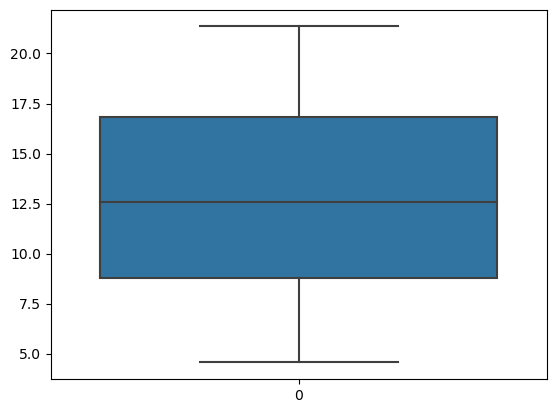

In [12]:
sn.boxplot(train['Item_Weight'])

#### From above plot we conclude that there is no outliers, hence we go with mean imputation

In [15]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace = True)
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace = True)

In [16]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [19]:
train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [20]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace = True)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Exploratory Data Analysis

## Data Visualization of Numeric Columns

In [24]:
nums = train.select_dtypes(include=['float64', 'int64']).columns.to_numpy()
nums

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'], dtype=object)

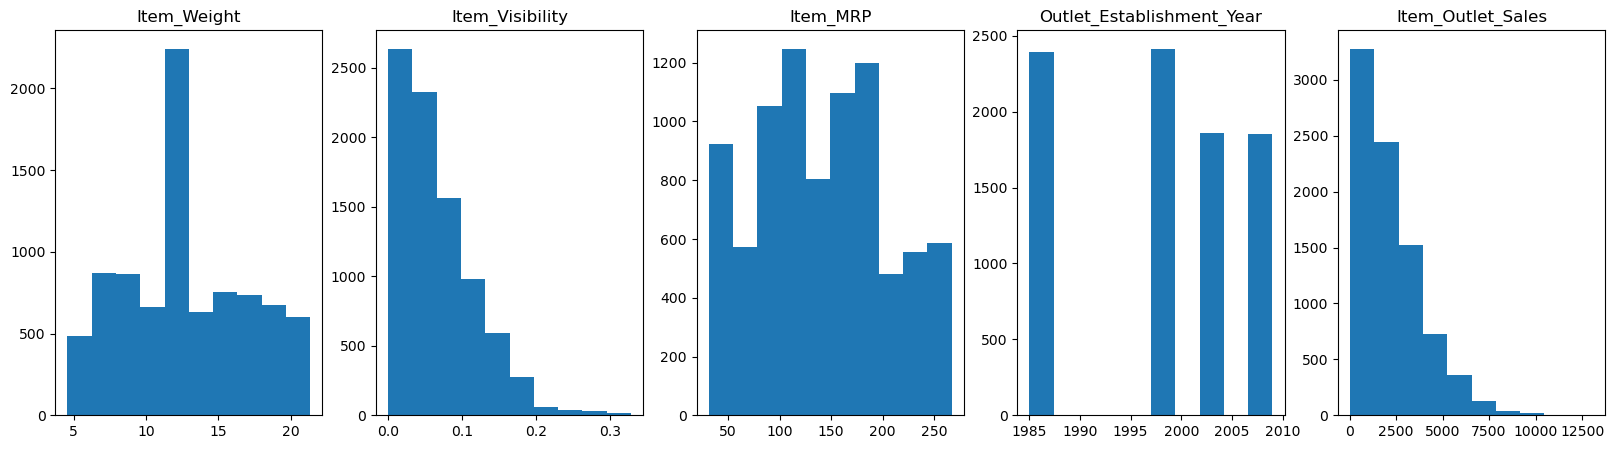

In [26]:
# Checking the distribution of the numeric Columns

fig, ax = plt.subplots(1, 5, figsize=(20, 5))

for i, col in enumerate(nums):
    ax[i].hist(train[col])
    ax[i].set_title(col)

#### It seems that the Item Visibility and Item outlet sales columns are right skewed!
#### We can apply Data transformations to make them Normally distributed.

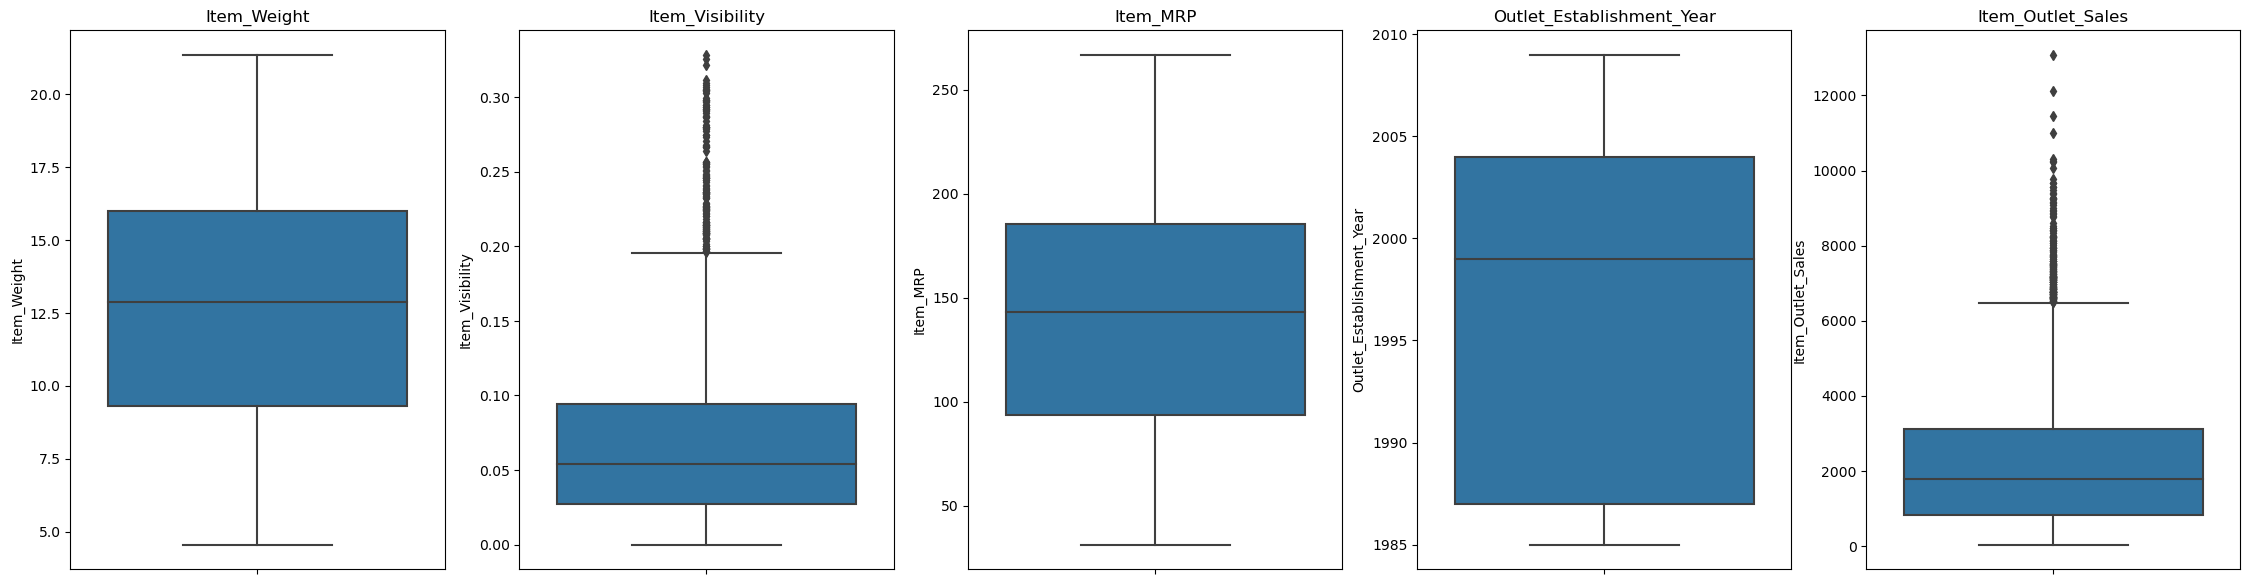

In [29]:
# Checking for outliers in the numeric columns

fig, ax = plt.subplots(1, 5, figsize=(28, 7))

for i, col in enumerate(nums):
    sn.boxplot(data=train, y=col, ax=ax[i])
    ax[i].set_title(col)

### It seems that the Item Visibility and Item outlet sales columns have some outliers which need to be handled!

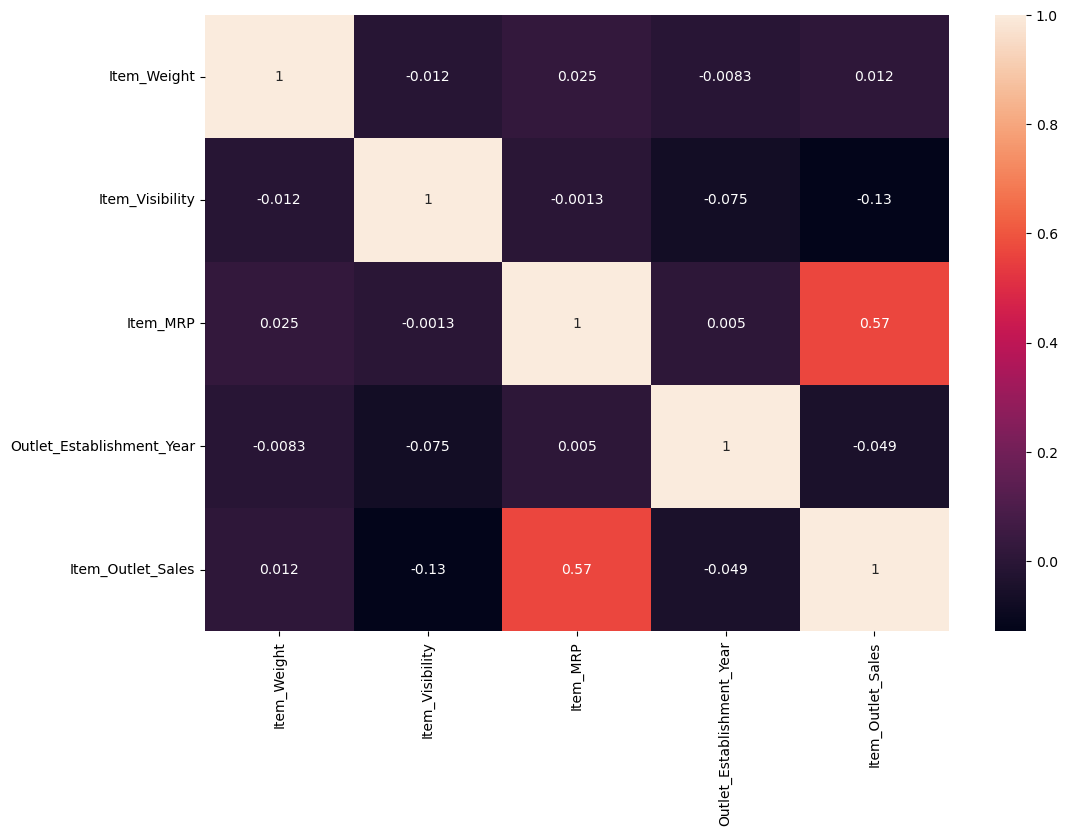

In [30]:
# correlation of numeric columns

plt.figure(figsize=(12,8))
sn.heatmap(train[nums].corr(),annot=True)
plt.show()

## Feature Engineering of Numeric Columns

In [33]:
def remove_outliers(col):
    q1 = train[col].quantile(0.25)
    q3 = train[col].quantile(0.75)
    iqr = q3 - q1

    upper_limit = q3 + 1.5*iqr
    count_outliers = train[train[col] > upper_limit].shape[0]

    print(f'{count_outliers} outliers out of {train.shape[0]}. i.e; {count_outliers/train.shape[0]*100:.2f}% of outliers.')

    return train[train[col] < upper_limit]

In [34]:
train = remove_outliers('Item_Visibility')

144 outliers out of 8523. i.e; 1.69% of outliers.


In [35]:
train = remove_outliers('Item_Outlet_Sales')

186 outliers out of 8379. i.e; 2.22% of outliers.


In [36]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


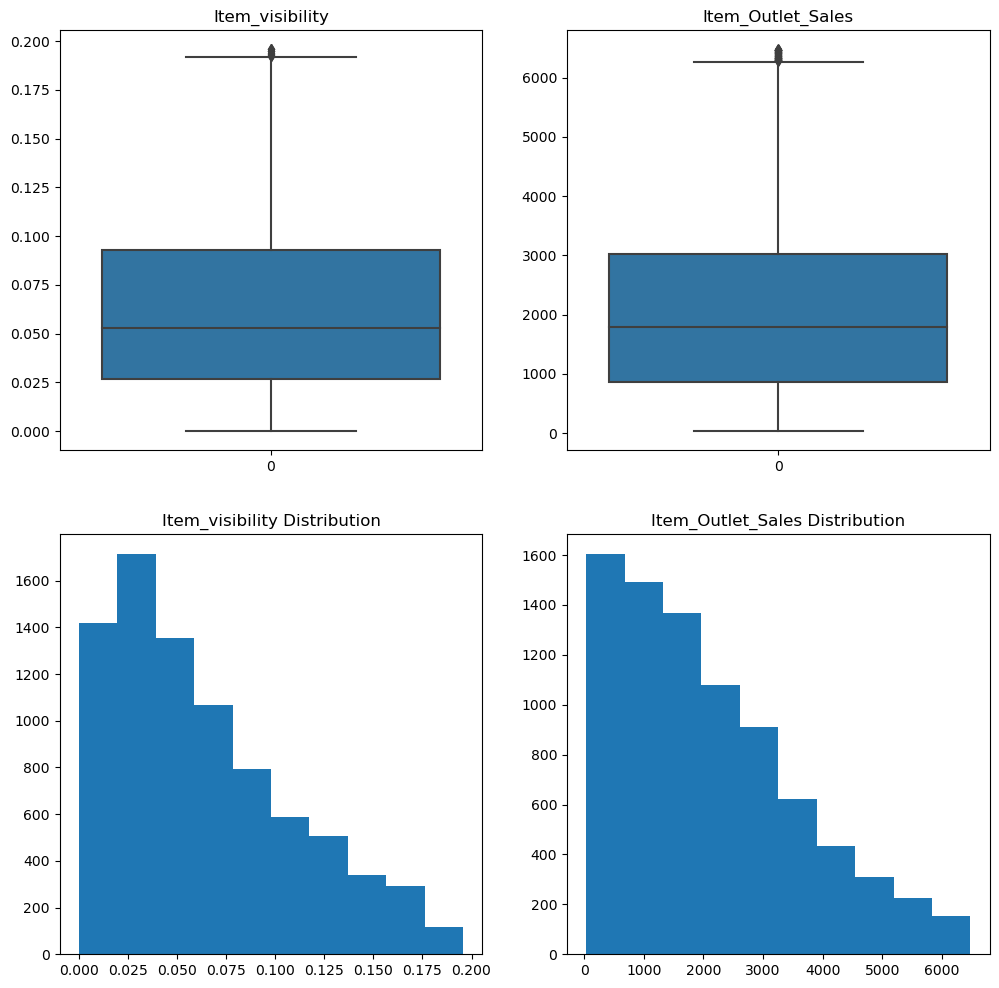

In [37]:
fig, ax = plt.subplots(2,2,figsize=(12,12))

sn.boxplot(train.Item_Visibility,ax=ax[0,0])
ax[0,0].set_title('Item_visibility')

sn.boxplot(train.Item_Outlet_Sales,ax=ax[0,1])
ax[0,1].set_title('Item_Outlet_Sales')

ax[1,0].hist(train.Item_Visibility)
ax[1,0].set_title('Item_visibility Distribution')

ax[1,1].hist(train.Item_Outlet_Sales)
ax[1,1].set_title('Item_Outlet_Sales Distribution')
plt.show()

In [40]:
log_item = np.log(train.Item_Visibility)

C:\Users\NAGARAJU\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [41]:
# AFter log, it is having negative values, hence to check the distribution, removing outliers.
q1 = log_item.quantile(0.25)
q3 = log_item.quantile(0.75)
iqr = q3-q1

ll = iqr + 1.5*q1

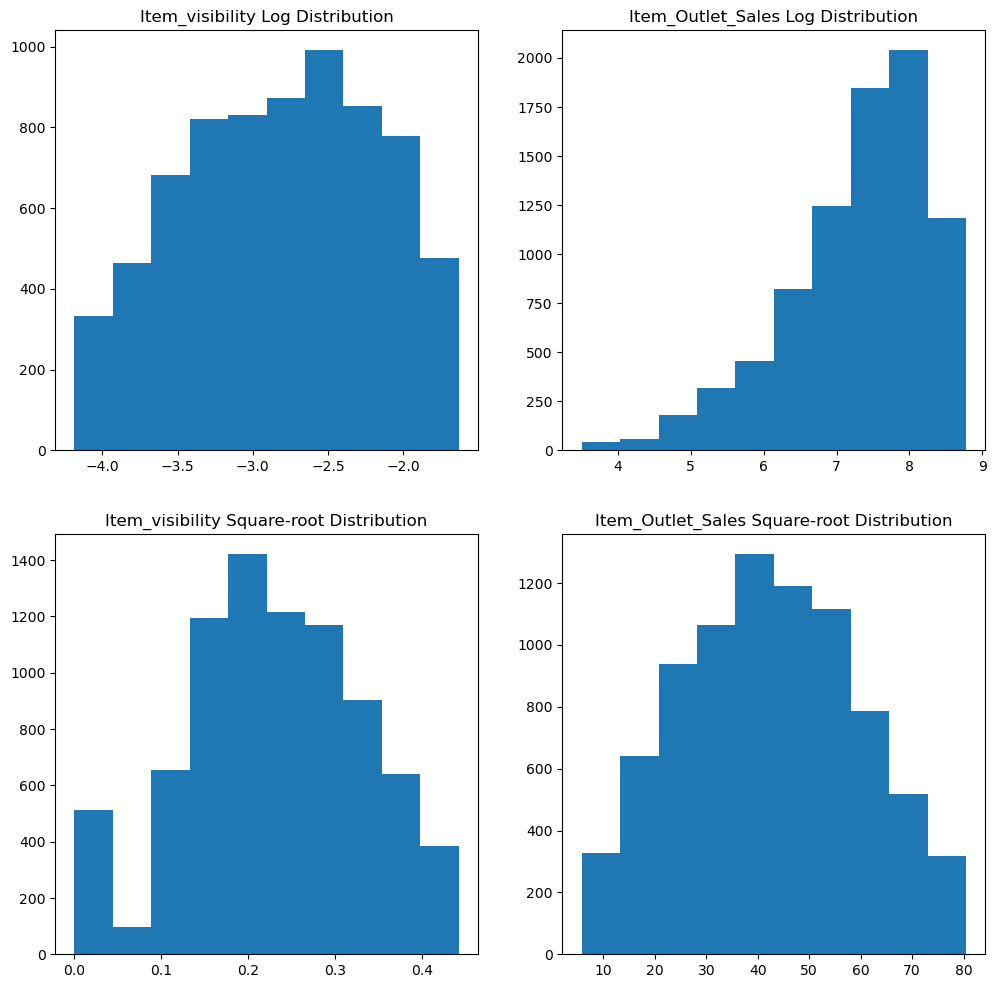

In [42]:
fig, ax1 = plt.subplots(2,2,figsize=(12,12))

ax1[0,0].hist(log_item[log_item>ll])
ax1[0,0].set_title('Item_visibility Log Distribution')

ax1[0,1].hist(np.log(train.Item_Outlet_Sales))
ax1[0,1].set_title('Item_Outlet_Sales Log Distribution')

ax1[1,0].hist(np.sqrt(train.Item_Visibility))
ax1[1,0].set_title('Item_visibility Square-root Distribution')

ax1[1,1].hist(np.sqrt(train.Item_Outlet_Sales))
ax1[1,1].set_title('Item_Outlet_Sales Square-root Distribution')

plt.show()

#### Compartively, we can say that applying square root have made them normally distributed. And hence, we can transform them with square root.

In [43]:
train.Item_Visibility = np.sqrt(train.Item_Visibility)
train.Item_Outlet_Sales = np.sqrt(train.Item_Outlet_Sales)

In [45]:
# Outlet establishment year will be much useful, if we can convert that to the no of years since started.

train['nof_years']=2023-train.Outlet_Establishment_Year

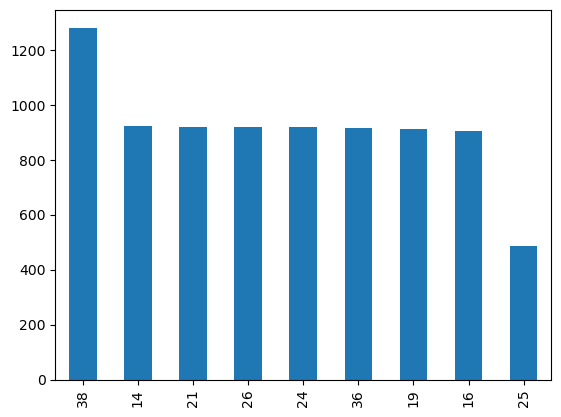

In [46]:
train.nof_years.value_counts().plot(kind='bar')
plt.show()

In [47]:
train.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [48]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,nof_years
0,FDA15,9.300,Low Fat,0.126678,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,61.115775,24
1,DRC01,5.920,Regular,0.138846,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,21.057607,14
2,FDN15,17.500,Low Fat,0.129461,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,45.795961,24
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,27.062520,25
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,31.538947,36
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.238293,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,52.710373,36
8519,FDS36,8.380,Regular,0.216754,Baking Goods,108.1570,OUT045,Medium,Tier 2,Supermarket Type1,23.436830,21
8520,NCJ29,10.600,Low Fat,0.187580,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,34.541477,19
8521,FDN46,7.210,Regular,0.381078,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,42.960419,14


## Data Visualization of Categorical Columns

In [50]:
cat_cols = train.select_dtypes(include='object').columns.to_numpy()

cat_cols

array(['Item_Identifier', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'], dtype=object)

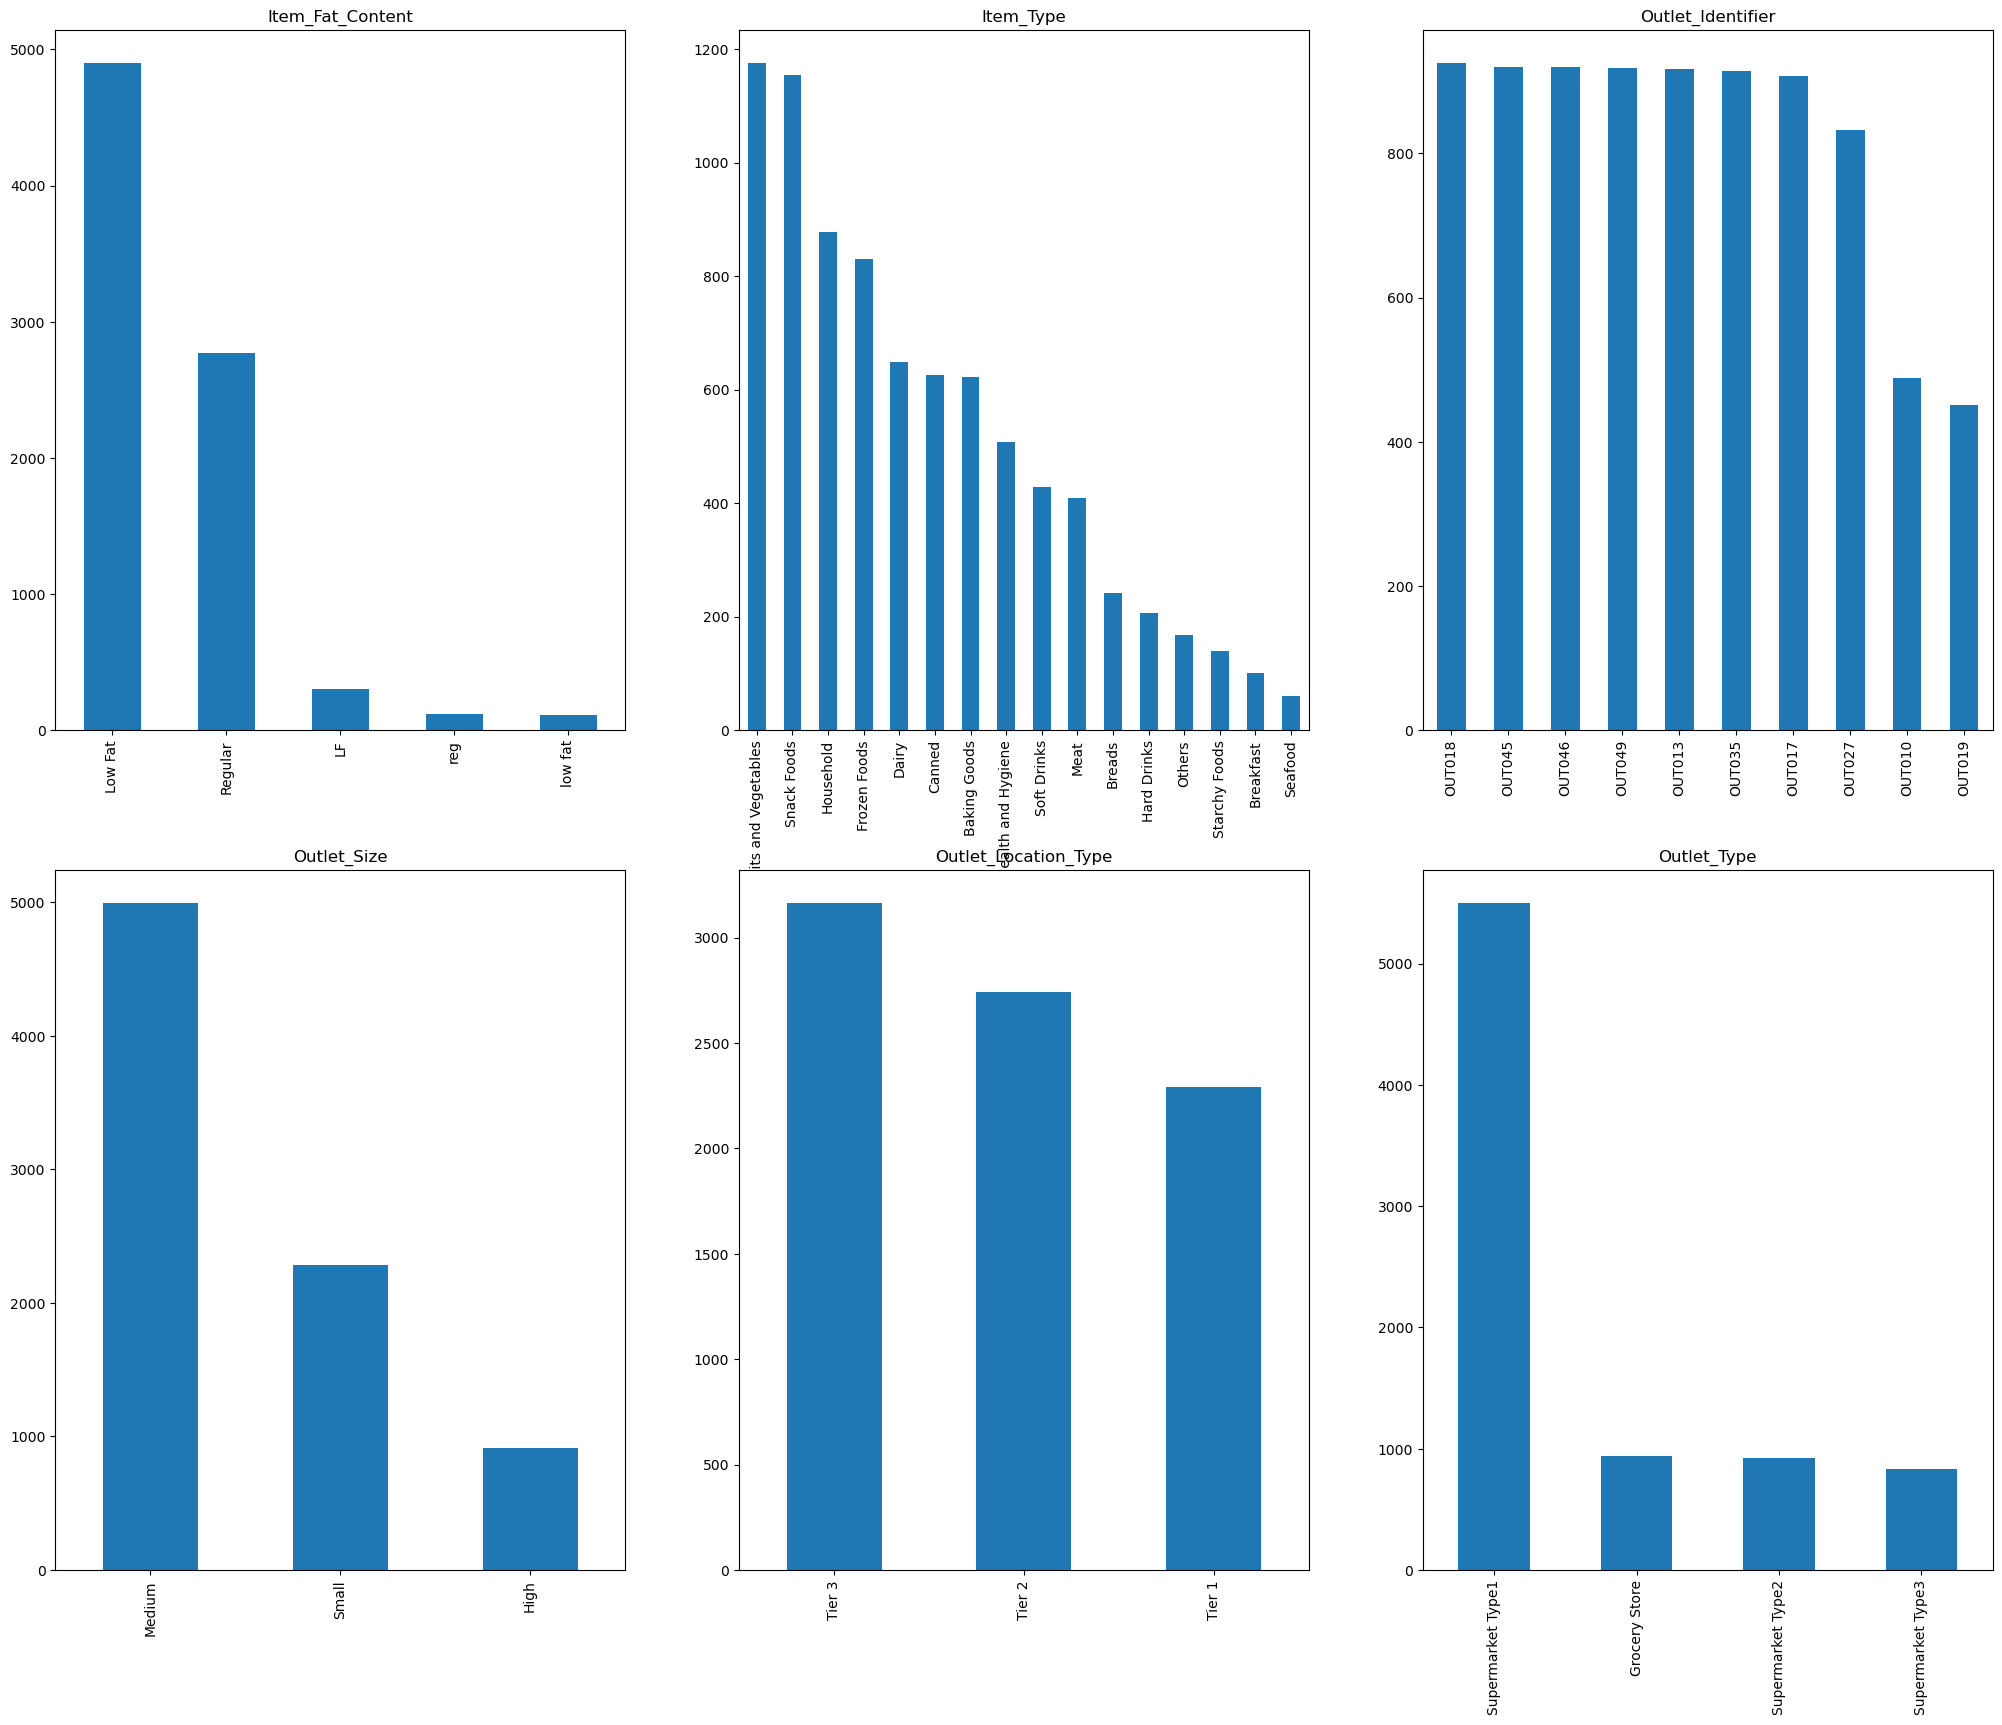

In [51]:
fig, ax = plt.subplots(2,3,figsize=(25,20))
a,b=0,0
for i,col in enumerate(cat_cols[1:]):
    if a!=1:
        train[col].value_counts().plot(kind='bar',ax=ax[a,b])
        ax[a,b].set_title(col)
        if b==2: a,b=1,0
        else: b+=1
    else:
        train[col].value_counts().plot(kind='bar',ax=ax[a,b])
        ax[a,b].set_title(col)
        b+=1

#### So it seems, Low fat is recorded in 3 different names, and regular is recorded in two diff names.
#### Outlet_Size, Item_Fat_Content, Outlet_Type, Outlet_Location_Type seems to be ordinal, and hence they can be label encoded.
#### Item_Type, Outlet_Identifier can be one hot encoded.

## Featuring Engineering of Categorical Columns

In [52]:
train.select_dtypes(include='object').head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


#### If we see the item identifier, the first characters of it are basically the categories, so we can categorize them in that way.

In [54]:
train['Item_Categories'] = train['Item_Identifier'].str[0:2]
train.drop('Item_Identifier',axis=1,inplace=True)

In [55]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,nof_years,Item_Categories
0,9.300,Low Fat,0.126678,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,61.115775,24,FD
1,5.920,Regular,0.138846,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,21.057607,14,DR
2,17.500,Low Fat,0.129461,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,45.795961,24,FD
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,27.062520,25,FD
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,31.538947,36,NC
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.238293,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,52.710373,36,FD
8519,8.380,Regular,0.216754,Baking Goods,108.1570,OUT045,Medium,Tier 2,Supermarket Type1,23.436830,21,FD
8520,10.600,Low Fat,0.187580,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,34.541477,19,NC
8521,7.210,Regular,0.381078,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,42.960419,14,FD


In [57]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

##### May be it looks like repeated by error

In [59]:
train['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat',inplace=True)
train['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [60]:
train.Item_Fat_Content.value_counts(dropna=False)

Low Fat    5309
Regular    2884
Name: Item_Fat_Content, dtype: int64

## Label Encoding of Categorical Columns

In [61]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [63]:
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])
train['Outlet_Size'] = le.fit_transform(train['Outlet_Size'])
train['Outlet_Type'] = le.fit_transform(train['Outlet_Type'])
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])

In [64]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,nof_years,Item_Categories
0,9.300,0,0.126678,Dairy,249.8092,OUT049,1,0,1,61.115775,24,FD
1,5.920,1,0.138846,Soft Drinks,48.2692,OUT018,1,0,2,21.057607,14,DR
2,17.500,0,0.129461,Meat,141.6180,OUT049,1,0,1,45.795961,24,FD
3,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1,0,0,27.062520,25,FD
4,8.930,0,0.000000,Household,53.8614,OUT013,0,0,1,31.538947,36,NC
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.238293,Snack Foods,214.5218,OUT013,0,0,1,52.710373,36,FD
8519,8.380,1,0.216754,Baking Goods,108.1570,OUT045,1,0,1,23.436830,21,FD
8520,10.600,0,0.187580,Health and Hygiene,85.1224,OUT035,2,0,1,34.541477,19,NC
8521,7.210,1,0.381078,Snack Foods,103.1332,OUT018,1,0,2,42.960419,14,FD


In [65]:
train.select_dtypes(include='object')

,Item_Type,Outlet_Identifier,Item_Categories
0,Dairy,OUT049,FD
1,Soft Drinks,OUT018,DR
2,Meat,OUT049,FD
3,Fruits and Vegetables,OUT010,FD
4,Household,OUT013,NC
...,...,...,...
8518,Snack Foods,OUT013,FD
8519,Baking Goods,OUT045,FD
8520,Health and Hygiene,OUT035,NC
8521,Snack Foods,OUT018,FD


### For rest of the categorical columns go for one hot encoding

In [66]:
train = pd.get_dummies(train, columns=['Item_Type', 'Item_Categories', 'Outlet_Identifier'])

In [67]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,nof_years,Item_Type_Baking Goods,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,0,0.126678,249.8092,1,0,1,61.115775,24,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,1,0.138846,48.2692,1,0,2,21.057607,14,0,...,0,0,0,1,0,0,0,0,0,0
2,17.500,0,0.129461,141.6180,1,0,1,45.795961,24,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,1,0.000000,182.0950,1,0,0,27.062520,25,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0,0.000000,53.8614,0,0,1,31.538947,36,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.238293,214.5218,0,0,1,52.710373,36,0,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,1,0.216754,108.1570,1,0,1,23.436830,21,1,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0,0.187580,85.1224,2,0,1,34.541477,19,0,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,1,0.381078,103.1332,1,0,2,42.960419,14,0,...,0,0,0,1,0,0,0,0,0,0


## Model Building

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X = train.drop('Item_Outlet_Sales',axis = 1)
y = train.Item_Outlet_Sales

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=101, test_size=0.3)

In [72]:
from sklearn.linear_model import LinearRegression

In [78]:
from sklearn.metrics import r2_score

In [76]:
def scores(model):
    train_pred = model.predict(X_train)
    print(f'Score on Training dataset = {r2_score(y_train,train_pred)}')
    test_pred = model.predict(X_test)
    print(f'Score on Training dataset = {r2_score(y_test,test_pred)}')

## Linear Regression

In [79]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
scores(lin_reg)

Score on Training dataset = 0.639643641686424
Score on Training dataset = 0.6211730337826491


## Regularized Linear Regression

In [80]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train,y_train)
scores(ridge)

Score on Training dataset = 0.639642893750421
Score on Training dataset = 0.6211772452129012


In [81]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train,y_train)
scores(lasso)

Score on Training dataset = 0.4865729624848242
Score on Training dataset = 0.46207868778648364


## Random Forest

In [82]:
from sklearn.ensemble import RandomForestRegressor

rfg = RandomForestRegressor()
rfg.fit(X_train,y_train)
scores(rfg)

Score on Training dataset = 0.9463584336416524
Score on Training dataset = 0.6118420235351392


## XGBoost

In [85]:
import xgboost as xgb

In [86]:
xgbs = xgb.XGBRegressor()

In [87]:
xgbs.fit(X_train,y_train)
scores(xgbs)

Score on Training dataset = 0.8855167626045819
Score on Training dataset = 0.5783667605201539


## Hyper Parameter Tuning

   ### Hyperparameter Tunig for Ridge

In [88]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Initialize the Ridge model
ridge = Ridge()

# Define the hyperparameters to tune
param_grid = {
    'alpha': [0.1, 1,3,5,7,9,10],
    'fit_intercept': [True]
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'alpha': 10, 'fit_intercept': True}
Best score:  0.6356024715820043


In [89]:
ridge_best = Ridge(alpha=10)
ridge_best.fit(X_train,y_train)
scores(ridge_best)

Score on Training dataset = 0.6395744224796545
Score on Training dataset = 0.6211444720100148


## Hyperparameter Tuning for Lasso

In [92]:
# Create a Lasso regressor
lasso = Lasso()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'fit_intercept': [True, False],
    'max_iter': [1000, 2000, 3000]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'alpha': 0.1, 'fit_intercept': True, 'max_iter': 1000}


In [93]:
best_lasso = Lasso(**best_params)
best_lasso.fit(X_train,y_train)
scores(best_lasso)

Score on Training dataset = 0.6356795079947097
Score on Training dataset = 0.6194759849191975


## Hyperparameter Tuning for Random Forest

In [101]:
# Create a RandomForestRegressor
rf = RandomForestRegressor()

# Define the hyperparameter grid with fewer parameters
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
}

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Use the best parameters to create a new RandomForestRegressor model
best_rf = RandomForestRegressor(**best_params)

# Fit the model with the best parameters
best_rf.fit(X_train, y_train)

scores(best_rf)

C:\Users\NAGARAJU\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Score on Training dataset = 0.6671744880434449
Score on Training dataset = 0.6414650969982381


## Hyperparameter Tuning for XGBoost

In [99]:
# create a XGBRegressor
xg = xgb.XGBRegressor()

booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

## Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

# perform random_cv with cross-validation
random_cv = RandomizedSearchCV(estimator=xgbs,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)
# fit the model
random_cv.fit(X_train,y_train)

# Get the best parameters
best_params = random_cv.best_params_

print(best_params)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 2, 'learning_rate': 0.1, 'booster': 'gbtree', 'base_score': 0.5}


In [100]:
best_xgb = xgb.XGBRegressor(**best_params)
best_xgb.fit(X_train,y_train)
scores(best_xgb)

Score on Training dataset = 0.6718375355602499
Score on Training dataset = 0.6467550966701483


## Summary

### All of these, XGBoost and Random Forest gave the best score after hyperparameter tuning . So, we conclude that XGBoost and Random Forest are the best models.